
# Assignment 2 for Course 1MS041
Make sure you pass the `# ... Test` cells and
 submit your solution notebook in the corresponding assignment on the course website. You can submit multiple times before the deadline and your highest score will be used.

---
## Assignment 2, PROBLEM 1
Maximum Points = 8


A courier company operates a fleet of delivery trucks that make deliveries to different parts of the city. The trucks are equipped with GPS tracking devices that record the location of each truck at regular intervals. The locations are divided into three regions: downtown, the suburbs, and the countryside. The following table shows the probabilities of a truck transitioning between these regions at each time step:

| Current region | Probability of transitioning to downtown | Probability of transitioning to the suburbs | Probability of transitioning to the countryside |
|----------------|--------------------------------------------|-----------------------------------------------|------------------------------------------------|
| Downtown       | 0.3                                      | 0.4                                           | 0.3                                            |
| Suburbs        | 0.2                                      | 0.5                                           | 0.3                                            |
| Countryside    | 0.4                                      | 0.3                                           | 0.3                                            |

1. If a truck is currently in the suburbs, what is the probability that it will be in the downtown region after two time steps? [1.5p]
2. If a truck is currently in the suburbs, what is the probability that it will be in the downtown region **the first time** after two time steps? [1.5p]
3. Is this Markov chain irreducible? [1.5p]
4. What is the stationary distribution? [1.5p]
5. Advanced question: What is the expected number of steps until the first time one enters the downtown region having started in the suburbs region. Hint: to get within 1 decimal point, it is enough to compute the probabilities for hitting times below 30. [2p]



In [14]:
# Part 1
import numpy as np
P = np.array([[0.3, 0.4, 0.3],
              [0.2, 0.5, 0.3],
              [0.4, 0.3, 0.3]])
P_squared =P@P
print(P_squared)
print(P_squared[1,0])


# Fill in the answer to part 1 below as a decimal number
problem1_p1 = 0.28

[[0.29 0.41 0.3 ]
 [0.28 0.42 0.3 ]
 [0.3  0.4  0.3 ]]
0.28


In [15]:
# Part 2
#start: suburbs
#probability that we are in Downtown after 2 steps

# Fill in the answer to part 2 below as a decimal number
problem1_p2 = 0.22

In [16]:
# Part 3

# Fill in the answer to part 3 below as a boolean
problem1_irreducible = True

In [17]:
# Part 4 - Stationary Distribution APPROACH 1 (eigenvalues and eigenvectors)

# Define the transition matrix as given in the table
P = np.array([
    [0.3, 0.4, 0.3],  # Transition probabilities from Downtown
    [0.2, 0.5, 0.3],  # Transition probabilities from Suburbs
    [0.4, 0.3, 0.3]   # Transition probabilities from Countryside
])
#stationary distribution satisfies P*π=π:
P_T = P.T
eigenvalues, eigenvectors = np.linalg.eig(P_T)

# Find the eigenvector corresponding to eigenvalue 1
index = np.where(np.isclose(eigenvalues, 1))[0][0]
stationary_vector = eigenvectors[:, index]
print("Raw stationary vector:", stationary_vector)

#Normalizing the eignenvector (so that its elements sum to one to enforce that the stationary distribution is probablistic and itse elements therefore sum to one)
stationary_distribution = stationary_vector / np.sum(stationary_vector)
print("Stationary distribution:", stationary_distribution)




Raw stationary vector: [-0.49365111 -0.70250351 -0.51263769]
Stationary distribution: [0.28888889 0.41111111 0.3       ]


In [18]:
# Part 4 (approach 2 -- linear system)

# Fill in the answer to part 4 below
# the answer should be a numpy array of length 3
# make sure that the entries sums to 1!
"""
eigenvalues, eigenvectors = np.linalg.eig(P.T)
print(eigenvalues)
print(eigenvectors)
#normalize eigenvector corresponding to eigenvalue 1
problem1_stationary=eigenvectors[:,0]/np.linalg.norm(eigenvectors[:,0])
print(problem1_stationary)
"""
import numpy as np

# Define the transition matrix as given in the table
P = np.array([
    [0.3, 0.4, 0.3],  # Transition probabilities from Downtown
    [0.2, 0.5, 0.3],  # Transition probabilities from Suburbs
    [0.4, 0.3, 0.3]   # Transition probabilities from Countryside
])

# To find the stationary distribution, we set up the equation πP = π,
# which is equivalent to solving (P.T - I) * π = 0 with the constraint sum(π) = 1.

# Step 1: Subtract the identity matrix from the transpose of P
A = P.T - np.eye(3)
print(A)

# Step 2: Add the normalization condition that the probabilities sum to 1
A = np.vstack([A, np.ones(3)])
b = np.array([0, 0, 0, 1])

# Step 3: Solve for the stationary distribution using numpy's least squares solver

stationary_distribution = np.linalg.lstsq(A, b)[0]

# Print the results
print("Stationary distribution:", stationary_distribution)


problem1_stationary = np.array([0.288,0.411,0.3])

[[-0.7  0.2  0.4]
 [ 0.4 -0.5  0.3]
 [ 0.3  0.3 -0.7]]
Stationary distribution: [0.28888889 0.41111111 0.3       ]


In [19]:
# Part 5

# Fill in the answer to part 5 below
# That is, the expected number of steps as a decimal number
import numpy as np

# Coefficient matrix A and RHS vector b based on our equations
A = np.array([
    [0.5, -0.3],
    [-0.3, 0.7]
])

b = np.array([1.0, 1.0])

# Solve for h_SD and h_CD
hitting_times = np.linalg.solve(A, b)
print(hitting_times)

# Output the expected hitting time from suburbs to downtown
h_SD = hitting_times[0]
print("Expected number of steps to reach downtown from suburbs:", h_SD)

problem1_ET = 3.8461

[3.84615385 3.07692308]
Expected number of steps to reach downtown from suburbs: 3.846153846153846


---
## Assignment 2, PROBLEM 2
Maximum Points = 4


Use the **Multi-dimensional Constrained Optimisation** example (in `07-Optimization.ipynb`) to numerically find the MLe for the mean and variance parameter based on `normallySimulatedDataSamples`, an array obtained by a specific simulation of $30$ IID samples from the $Normal(10,2)$ random variable.

Recall that $Normal(\mu, \sigma^2)$ RV has the probability density function given by:

$$
f(x ;\mu, \sigma) = \displaystyle\frac{1}{\sigma\sqrt{2\pi}}\exp\left(\frac{-1}{2\sigma^2}(x-\mu)^2\right)
$$

The two parameters, $\mu \in \mathbb{R} := (-\infty,\infty)$ and $\sigma \in (0,\infty)$, are sometimes referred to as the location and scale parameters.

You know that the log likelihood function for $n$ IID samples from a Normal RV with parameters $\mu$ and $\sigma$ simply follows from $\sum_{i=1}^n \log(f(x_i; \mu,\sigma))$, based on the IID assumption. 

NOTE: When setting bounding boxes for $\mu$ and $\sigma$ try to start with some guesses like $[-20,20]$ and $[0.1,5.0]$ and make it larger if the solution is at the boundary. Making the left bounding-point for $\sigma$ too close to $0.0$ will cause division by zero Warnings. Other numerical instabilities can happen in such iterative numerical solutions to the MLe. You need to be patient and learn by trial-and-error. You will see the mathematical theory in more details in a future course in scientific computing/optimisation. So don't worry too much now except learning to use it for our problems.  

In [20]:

import numpy as np
from scipy import optimize
# do NOT change the next three lines
np.random.seed(123456) # set seed
# simulate 30 IID samples drawn from Normal(10,2)RV
normallySimulatedDataSamples = np.random.normal(10,2,30) 

# define the negative log likelihood function you want to minimise by editing 
def negLogLklOfIIDNormalSamples(parameters):
    '''return the -log(likelihood) of normallySimulatedDataSamples with mean and var parameters'''
    mu_param=parameters[0]
    sigma_param=parameters[1]
    # Compute the negative log-likelihood
    n = len(normallySimulatedDataSamples)
    log_likelihood = -np.sum(
        -0.5 * np.log(2 * np.pi * sigma_param**2)
        - ((normallySimulatedDataSamples - mu_param) ** 2) / (2 * sigma_param**2)
    )
    return log_likelihood



# you should only change XXX below and not anything else
parameter_bounding_box=((-20, 20), (0.1, 5)) # specify the constraints (search space) for each parameter - some guess work...
initial_arguments = np.array([10, 1]) # point in 2D to initialise the minimize algorithm
result_problem2_opt = optimize.minimize(negLogLklOfIIDNormalSamples, initial_arguments, bounds=parameter_bounding_box) 
# call the minimize method above finally! you need to play a bit to get initial conditions and bounding box ok
result_problem2_opt


  message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
  success: True
   status: 0
      fun: 58.63138728292095
        x: [ 9.269e+00  1.708e+00]
      nit: 9
      jac: [-2.842e-05  1.457e-04]
     nfev: 36
     njev: 12
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>

---
## Assignment 2, PROBLEM 3
Maximum Points = 4



Derive the maximum likelihood estimate for $n$ IID samples from a random variable with the following probability density function:
$$
f(x; \lambda) = \frac{1}{24} \lambda^5 x^4 \exp(-\lambda x), \qquad \text{ where, } \lambda>0, x > 0
$$

You can solve the MLe by hand (using pencil paper or using key-strokes). Present your solution as the return value of a function called `def MLeForAssignment2Problem3(x)`, where `x` is a list of $n$ input data points.

In [21]:

# do not change the name of the function, just replace XXX with the appropriate expressions for the MLe
def MLeForAssignment2Problem3(x):
    '''write comment of what this function does'''
    n=len(x)
    return 5*n/np.sum(x)

---
## Assignment 2, PROBLEM 4
Maximum Points = 8


## Random variable generation and transformation

The purpose of this problem is to show that you can implement your own sampler, this will be built in the following three steps:

1. [2p] Implement a Linear Congruential Generator where you tested out a good combination (a large $M$ with $a,b$ satisfying the Hull-Dobell (Thm 6.8)) of parameters. Follow the instructions in the code block.
2. [2p] Using a generator construct random numbers from the uniform $[0,1]$ distribution.
3. [4p] Using a uniform $[0,1]$ random generator, generate samples from 

$$p_0(x) = \frac{\pi}{2}|\sin(2\pi x)|, \quad x \in [0,1] \enspace .$$

Using the **Accept-Reject** sampler (**Algorithm 1** in TFDS notes) with sampling density given by the uniform $[0,1]$ distribution.

In [22]:
def LCG(size=None, seed=0):
    # Parameters for maximal period
    m = 2**31 - 1  # Large prime modulus
    a = 1103515245  # Multiplier (common choice)
    b = 12345  # Increment (common choice)
    
    x = seed   # seed is the starting position
    retValue = []
    for _ in range(size):
        x = (a * x + b) % m
        retValue.append(x)
    return retValue

## To generate uniform random numbers, we divide by the period (m)
def LCG_uniform(size=None, seed=0, decimals=None):
    # Parameters for maximal period
    m = 2**31 - 1  # Large prime modulus
    a = 1103515245  # Multiplier (common choice)
    b = 12345  # Increment (common choice)
    
    x = seed   # seed is the starting position
    retValue = []
    for _ in range(size):
        x = (a * x + b) % m
        retValue.append(np.round(x/m, decimals))
    return retValue

random_list= LCG(size=30, seed=0)
uniformlist = LCG_uniform(size=30, seed=0, decimals=2)
print(random_list)
print(uniformlist)

[12345, 1406938949, 178066070, 1543701248, 427461576, 562845833, 1609490218, 377220791, 2040027864, 186150528, 667276653, 167860840, 95653539, 1525258573, 795960552, 1272442040, 173617473, 865290808, 270830898, 1905073316, 1560342131, 835276979, 5600085, 1987058269, 1401826095, 1694140998, 1087770539, 2122194134, 754953873, 2085830575]
[np.float64(0.0), np.float64(0.66), np.float64(0.08), np.float64(0.72), np.float64(0.2), np.float64(0.26), np.float64(0.75), np.float64(0.18), np.float64(0.95), np.float64(0.09), np.float64(0.31), np.float64(0.08), np.float64(0.04), np.float64(0.71), np.float64(0.37), np.float64(0.59), np.float64(0.08), np.float64(0.4), np.float64(0.13), np.float64(0.89), np.float64(0.73), np.float64(0.39), np.float64(0.0), np.float64(0.93), np.float64(0.65), np.float64(0.79), np.float64(0.51), np.float64(0.99), np.float64(0.35), np.float64(0.97)]


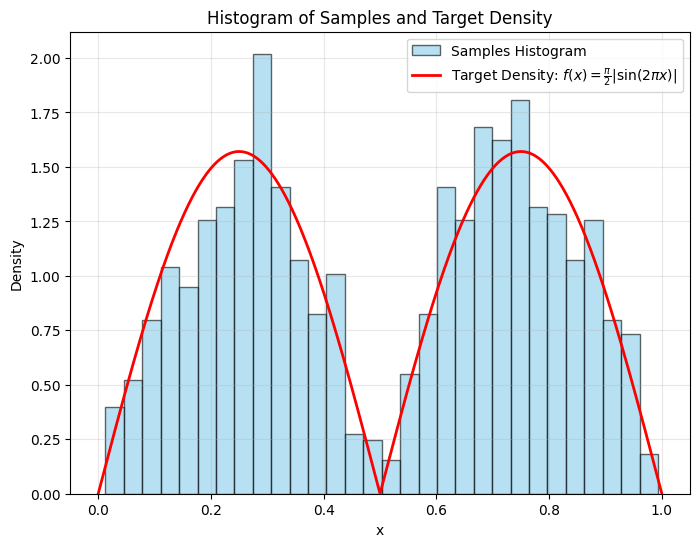

In [23]:


def accept_reject_sampler(n_samples, M, target_density, proposal_sampler, proposal_density):
    """
    Accept-Reject Sampling Algorithm
    
    Parameters:
        n_samples (int): Number of samples to generate.
        M (float): Scaling constant such that M * proposal_density(x) >= target(x) for all x.
        target (function): The target density function.
        proposal_sampler (function): Function to sample from the proposal distribution.
        proposal_density (function): The density of the proposal distribution.
    
    Returns:
        np.array: Accepted samples from the target distribution.
    """
    accepted_samples = []
    
    while len(accepted_samples) < n_samples:
        # Generate a candidate sample from the proposal distribution
        x = proposal_sampler()
        
        # Generate a uniform random number for acceptance criterion
        u = np.random.uniform(0, 1)
        
        # Acceptance condition
        if u <= target_density(x) / (M * proposal_density(x)):
            accepted_samples.append(x)
    
    return np.array(accepted_samples)



#################################################################
# Target density: f(x) = pi/2 * |sin(2*pi*x)|
def target_density(x):
    return (np.pi / 2) * np.abs(np.sin(2 * np.pi * x))

# Proposal sampler: samples from U(0, 1)
#x = np.random.normal(mu, sigma)
def proposal_sampler():
    return np.random.uniform(0, 1)

# Proposal density: q(x) = 1 for U(0, 1)
#proposal_density = norm.pdf(x, loc=0.5, scale=0.1) #scipy.stats.norm
def proposal_density(x):
    return 1 if 0 <= x <= 1 else 0

# M: maximum value of target_density(x) / proposal_density(x)
M = (np.pi / 2)  # Maximum value of |sin(2*pi*x)| is 1, so M = pi/2 * 1

# Generate 1000 samples
samples = accept_reject_sampler(n_samples=1000, M=M, target_density=target_density, 
                                 proposal_sampler=proposal_sampler, 
                                 proposal_density=proposal_density)

import matplotlib.pyplot as plt
x = np.linspace(0, 1, 1000)  # High resolution for smooth plotting
plt.figure(figsize=(8, 6))

# Plot the histogram of samples
plt.hist(samples, bins=30, density=True, alpha=0.6, color='skyblue', edgecolor='black', label='Samples Histogram')

# Plot the target density
plt.plot(x, target_density(x), color='red', linewidth=2, label=r'Target Density: $f(x) = \frac{\pi}{2} |\sin(2\pi x)|$')

# Add labels, legend, and title
plt.xlabel('x')
plt.ylabel('Density')
plt.title('Histogram of Samples and Target Density')
plt.legend()

# Show the plot
plt.grid(alpha=0.3)
plt.show()







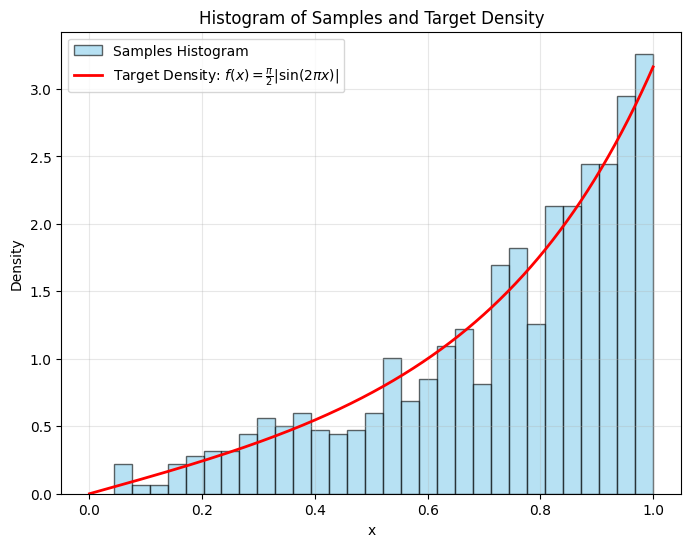

In [24]:
def target_density(x):
    return 2*x*np.exp(x**2)/(np.exp(1)-1)

# Proposal sampler: samples from U(0, 1)
def proposal_sampler():
    return np.random.uniform(0, 1)

# Proposal density: q(x) = 1 for U(0, 1)
#proposal_density = norm.pdf(x, loc=0.5, scale=0.1) #scipy.stats.norm
def proposal_density(x):
    return 1 if 0 <= x <= 1 else 0

M=10


# Generate 1000 samples
samples = accept_reject_sampler(n_samples=1000, M=M, target_density=target_density, 
                                 proposal_sampler=proposal_sampler, 
                                 proposal_density=proposal_density)

x = np.linspace(0, 1, 1000)  # High resolution for smooth plotting
plt.figure(figsize=(8, 6))

# Plot the histogram of samples
plt.hist(samples, bins=30, density=True, alpha=0.6, color='skyblue', edgecolor='black', label='Samples Histogram')

# Plot the target density
plt.plot(x, target_density(x), color='red', linewidth=2, label=r'Target Density: $f(x) = \frac{\pi}{2} |\sin(2\pi x)|$')

# Add labels, legend, and title
plt.xlabel('x')
plt.ylabel('Density')
plt.title('Histogram of Samples and Target Density')
plt.legend()

# Show the plot
plt.grid(alpha=0.3)
plt.show()



---
#### Local Test for Assignment 2, PROBLEM 4
Evaluate cell below to make sure your answer is valid.                             You **should not** modify anything in the cell below when evaluating it to do a local test of                             your solution.
You may need to include and evaluate code snippets from lecture notebooks in cells above to make the local test work correctly sometimes (see error messages for clues). This is meant to help you become efficient at recalling materials covered in lectures that relate to this problem. Such local tests will generally not be available in the exam.

In [25]:

# If you managed to solve all three parts you can test the following code to see if it runs
# you have to change the period to match your LCG though, this is marked as XXX.
# It is a very good idea to check these things using the histogram function in sagemath
# try with a larger number of samples, up to 10000 should run

print("LCG output: %s" % problem4_LCG(size=10, seed = 1))

period = XXX

print("Uniform sampler %s" % problem4_uniform(generator=problem4_LCG, period = period, size=10, seed=1))

uniform_sampler = lambda size,seed: problem4_uniform(generator=problem4_LCG, period = period, size=size, seed=seed)

print("Accept-Reject sampler %s" % problem4_accept_reject(uniformGenerator = uniform_sampler,n_iterations=20,seed=1))

NameError: name 'problem4_LCG' is not defined

In [ ]:

# If however you did not manage to implement either part 1 or part 2 but still want to check part 3, you can run the code below

def testUniformGenerator(size,seed):
    import random
    random.seed(seed)
    
    return [random.uniform(0,1) for s in range(size)]

print("Accept-Reject sampler %s" % problem4_accept_reject(uniformGenerator=testUniformGenerator, n_iterations=20, seed=1))